# Assignment

### Q1

In [49]:
def delchar(s,c):
  if len(c)==1:
    for i in s:
      if c!=i:
        print(i,end="")
  else:
    print(s)

delchar('banana','n')

baaa

### Q2

In [50]:
def delchar(s,c):
  if len(c)==1:
    s=s.replace(c,"")
    return (s)
  else:
    return (s)


def shuffle(l1,l2):
  c=[]
  if len(l1)!=0 and len(l2)!=0:
    for i in range(min(len(l1), len(l2))):
      c.extend([l1[i],l2[i]])
      c.extend(l1[i+1:] or l2[i+1:])
  else:
    c.extend(l1[0:] or l2[0:])
  return (c)

### Q3

In [51]:
def accordian(l):
    """
    Function : takes as input a list of integer l and returns True 
    if the absolute difference between each adjacent pair of elements 
    alternates between increasing strictly and decreasing strictly.
    Input : List
    Return : Boolean
    """
    size = len(l)
    diff = []

    if size < 3:
        return False

    for i in range(size-1):
        abs_diff = abs(l[i+1]-l[i])
        diff.append(abs_diff)

    if len(diff) == 2:
        if abs(diff[0] - diff[1]) == 0:
            return False
        else:
            return True

    result = [a < b for a, b in zip(diff, diff[1:])]
    for i in range(len(result)-1):
        if result[i] == result[i+1]:
            return False
    return True

### Q4

# Students Performance Dataset

This data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

**Source:** Downloads (uminho.pt)

Attributes:--

1.	school :  student's school (binary: "GP" :  Gabriel Pereira or "MS" :  Mousinho da Silveira)
2.	sex :  student's sex (binary: "F" :  female or "M" :  male)
3.	age :  student's age (numeric: from 15 to 22)
4.	address :  student's home address type (binary: "U" :  urban or "R" :  rural)
5.	famsize :  family size (binary: "LE3" :  less or equal to 3 or "GT3" :  greater than 3)
6.	Pstatus :  parent's cohabitation status (binary: "T" :  living together or "A" :  apart)
7.	Medu :  mother's education (numeric: 0 :  none,  1 :  primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4: higher education)
8.	Fedu :  father's education (numeric: 0 :  none,  1 :  primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4 : higher education)
9.	Mjob :  mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10.	Fjob :  father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11.	reason :  reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12.	guardian :  student's guardian (nominal: "mother", "father" or "other")
13.	traveltime :  home to school travel time (numeric: 1 :  <15 min., 2 :  15 to 30 min., 3 :  30 min. to 1 hour, or 4 :  >1 hour)
14.	studytime :  weekly study time (numeric: 1 :  <2 hours, 2 :  2 to 5 hours, 3 :  5 to 10 hours, or 4 :  >10 hours)
15.	failures :  number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup :  extra educational support (binary: yes or no)
17.	famsup :  family educational support (binary: yes or no)
18.	paid :  extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities :  extra: curricular activities (binary: yes or no)
20.	nursery :  attended nursery school (binary: yes or no)
21.	higher :  wants to take higher education (binary: yes or no)
22.	internet :  Internet access at home (binary: yes or no)
23.	romantic :  with a romantic relationship (binary: yes or no)
24.	famrel :  quality of family relationships (numeric: from 1 :  very bad to 5 :  excellent)
25.	freetime :  free time after school (numeric: from 1 :  very low to 5 :  very high)
26.	goout :  going out with friends (numeric: from 1 :  very low to 5 :  very high)
27.	Dalc :  workday alcohol consumption (numeric: from 1 :  very low to 5 :  very high)
28.	Walc :  weekend alcohol consumption (numeric: from 1 :  very low to 5 :  very high)
29.	health :  current health status (numeric: from 1 :  very bad to 5 :  very good)
30.	absences :  number of school absences (numeric: from 0 to 93)

Grade attributes:
31.	G1 :  first period grade (numeric: from 0 to 20)
32.	G2 :  second period grade (numeric: from 0 to 20)
33.	G3 :  final grade (numeric: from 0 to 20, output target)


Attribute Analysis:
-	Merging of both the portuguese and math csv’s can give us insights about how students performance in one subject might translate to another
-	Some clear attribute relations exist which are ready to be explored like, schoolsup, famsup, nursery,health etc with the grades of the subject
-	Any exploration into the family attributes should yield interesting insights about the effect of home environment on students performance
-	Final grade attribute G3 will definitely be highly dependent on G1 and G2 grades, so a prediction without these attributes should be interesting t o try


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
student = pd.read_csv("/content/student-mat (1).csv")

In [54]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [55]:
student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [56]:
# i have removed some of the columns here because they are not needed.

student = student.drop(columns=["address","traveltime","studytime","internet","romantic","freetime","goout","Dalc","Walc","health"])

In [57]:
# here i am dropping duplicate values.

student = student.drop_duplicates()

In [58]:
# here i am checking uniqueness of evey columns.

student.nunique()

school         2
sex            2
age            8
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
famrel         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [59]:
# here i am checking summary of all the columns.
# here i am checking is there any problem with the data or not.

student.describe(include="all")

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,failures,schoolsup,famsup,paid,activities,nursery,higher,famrel,absences,G1,G2,G3
count,395,395,395.000000,395,395,395.000000,395.000000,395,395,395,395,395.000000,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,NaN,NaN,5,5,4,3,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,GT3,T,NaN,NaN,other,other,course,mother,NaN,no,yes,no,yes,yes,yes,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,281,354,NaN,NaN,141,217,145,273,NaN,344,242,214,201,314,375,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,8.000000,13.000000,13.000000,14.000000


In [62]:
# here i am checking null values.
# and Dtype of all columns.

student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  failures    395 non-null    int64 
 12  schoolsup   395 non-null    object
 13  famsup      395 non-null    object
 14  paid        395 non-null    object
 15  activities  395 non-null    object
 16  nursery     395 non-null    object
 17  higher      395 non-null    object
 18  famrel      395 non-null    int64 
 19  absences    395 non-null    int64 
 20  G1        

In [69]:
student.var()    # here i am checking variance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age          1.628285
Medu         1.198445
Fedu         1.184180
failures     0.553017
famrel       0.803997
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [70]:
student.std()   # here i am checking standard deviation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         1.276043
Medu        1.094735
Fedu        1.088201
failures    0.743651
famrel      0.896659
absences    8.003096
G1          3.319195
G2          3.761505
G3          4.581443
dtype: float64

In [71]:
student.skew()  # here i am checking skewness
                # skewness is going toward the right.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         0.466270
Medu       -0.318381
Fedu       -0.031672
failures    2.387026
famrel     -0.951882
absences    3.671579
G1          0.240613
G2         -0.431645
G3         -0.732672
dtype: float64

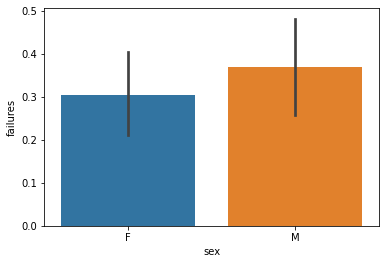

In [84]:
import seaborn as sns   # this is imported libraries.
sns.barplot(x="sex",y="failures", data=student)   # here i am making bar plot with comparison of male and female.
                                                  # here female failures are higher than male.

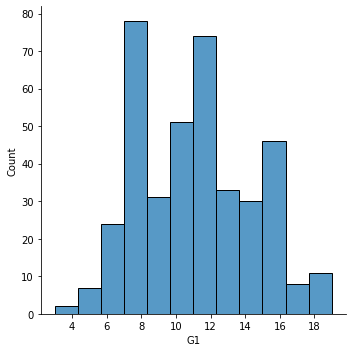

In [86]:
sns.displot(student,x="G1")      # in this plot i am checking the higher grade in first period --> G1
                                 # higher grade in first period is ----> 77.

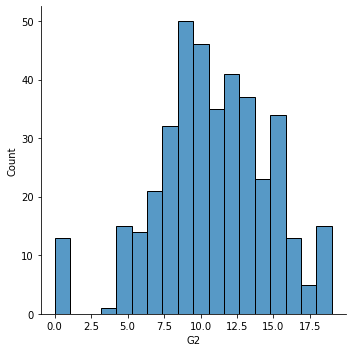

In [87]:
sns.displot(student,x="G2")     # in this plot i am checking again higher one which is 49 approx.
                                # this is second period ---> G2.

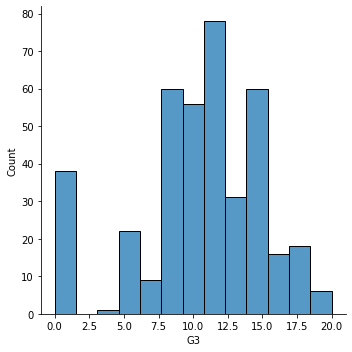

In [89]:
sns.displot(student,x="G3")     # so, this is third period which is -----> G3.
                                # here higher score is 76.

In [91]:
student.mean()    # here i am checking mean value here.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         16.696203
Medu         2.749367
Fedu         2.521519
failures     0.334177
famrel       3.944304
absences     5.708861
G1          10.908861
G2          10.713924
G3          10.415190
dtype: float64

In [92]:
student.mode()   # here i am checking mode value in this.

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,failures,schoolsup,famsup,paid,activities,nursery,higher,famrel,absences,G1,G2,G3
0,GP,F,16,GT3,T,4,2,other,other,course,mother,0,no,yes,no,yes,yes,yes,4,0,10,9,10


In [94]:
student.median()     # here i am checking median value.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         17.0
Medu         3.0
Fedu         2.0
failures     0.0
famrel       4.0
absences     4.0
G1          11.0
G2          11.0
G3          11.0
dtype: float64

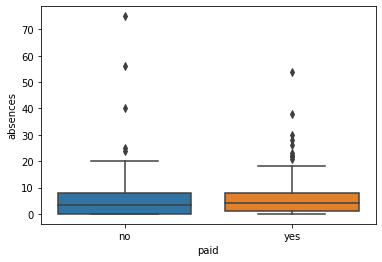

In [98]:
sns.boxplot(x="paid",y="absences",data=student)    # with this plot i am checking the student who is paying for extra class but not attending or absences.
                                                   # bot category student whether they are paying or not but the absence level both the same.
                                                   # but th differences of outliers in NO is higher than the YES.
                                                   # it means, student who is paying for extra classes are attending which is more than student who is not attending.